# AIT500 - Lab 2

## Objective

In this lab, you will build a data collection, data cleaning, and data transformation pipeline using the MNIST dataset.


## Dataset Description

### MNIST Dataset
<img src="lab02_mnist.png">

The [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) is a popular image dataset of handwritten digits that was modified from the National Institute of Standards and Technology (NIST) dataset.

It is a dataset of handwritten digits consists of 70,000 images, split into a training set of 60,000 examples, and a test set of 10,000 examples.  It is a good dataset to begin learning ML techniques and pattern recognition on real-world data.  
The digits have been size-normalized and centered in a fixed-size image and available online in many different formats.

The original dataset has been converted into CSV format for simple download.  As images are binary data, you will need to manipulate the text file to convert data back into an image format.

Each row of data contains the label and a sequence of 784 numerical values representing the value of each pixel in a 28*28 pixel image

### Lego Dataset

[Lego Dataset crafted by Kaggle community](https://www.kaggle.com/datasets/rtatman/lego-database).  This dataset contains the LEGO Parts/Sets/Colors and Inventories of every official LEGO set in the Rebrickable database. These files are current as of July 2017. If you need it to be more recent data, you can use Rebrickable’s API which provides up to date data, and additional features.

Schema of Lego dataset showing the relationship between the different `.csv` files.
<img src="lab02_lego_dataset_schema.png">


## Lab Instructions
1. Download the MNIST training set and test sets:
    - https://pjreddie.com/media/files/mnist_train.csv
    - https://pjreddie.com/media/files/mnist_test.csv
2. Load each file into its own pandas dataframe (limit to 2000 entries each)
    - validate that the dataframes are the size and shape you expect
4. Data exploration
    1. randomly pick a row and display its image by extracting:
       - the label column into a variable
       - the remaining 784 columns as a numpy array
    2. provide analysis and summary statistics of the dataset
5. Extract the label column into variable called `target_train`, `target_test` for train and test datasets respectively
6. Extract the pixel columns into variable called `feature_train`, `feature_test` for train and test datasets respectively
7. Perform a data transformation by selecting only the upper left 20x20 pixels.  Save the result into a new dataframe for both training and test datasets
    
- this image <img src="lab02_mnist_digit3.png" width=100>
    
- becomes this image <img src="lab02_mnist_digit3_partial.png"  width=80>

8. Download the [Lego dataset from Kaggle](https://www.kaggle.com/datasets/rtatman/lego-database) and load data into data frames
    - by examining the schema, join the appropriate dataframes together and answer these questions with code:

          - what is the oldest Lego set in the database?
          - what is the most recent Lego set in the database?
          - the quantity available for each Lego set
          - the number of sets in each theme
      


## Reference Information
- [MNIST dataset Wikipedia](https://en.wikipedia.org/wiki/MNIST_database)
- [MNIST-in-CSV description](https://www.kaggle.com/datasets/oddrationale/mnist-in-csv)
- [MNIST-in-CSV original download source and format description](https://pjreddie.com/projects/mnist-in-csv/)
- [Lego Dataset crafted by Kaggle community](https://www.kaggle.com/datasets/rtatman/lego-database)
- [Matplotlib Image Tutorial](https://matplotlib.org/stable/tutorials/images.html)


# Setup Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt # plotting library
import os
from PIL import Image
import numpy as np
os.getcwd()

Matplotlib is building the font cache; this may take a moment.


'/home/pi/workspace_ait500/labs'

# Import data

In [ ]:
# run curl at command line to download local version of iris dataset to working directory
!curl https://pjreddie.com/media/files/mnist_train.csv --output mnist_train.csv
!curl https://pjreddie.com/media/files/mnist_test.csv --output mnist_test.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  104M  100  104M    0     0  2569k      0  0:00:41  0:00:41 --:--:-- 3567k104M   17 18.7M    0     0  1983k      0  0:00:53  0:00:09  0:00:44 2000k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 17.4M  100 17.4M    0     0  1891k      0  0:00:09  0:00:09 --:--:-- 2793k


In [ ]:
# take a look at what's in the file, you can do this via command line with `less` or similar commands

!head -n 3 mnist_train.csv
!echo "----------------------"
!tail -n 3 mnist_test.csv

5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
# take a look at how many rows are in each file

!wc -l mnist_train.csv
!wc -l mnist_test.csv

60000 mnist_train.csv
10000 mnist_test.csv


In [2]:
NUMBER_OF_DIGITS_TO_READ = 10000

train_df = pd.read_csv('mnist_train.csv', header=None, nrows=NUMBER_OF_DIGITS_TO_READ)
test_df = pd.read_csv('mnist_test.csv', header=None, nrows=NUMBER_OF_DIGITS_TO_READ)

In [6]:
def show_digit(df:pd.DataFrame, row_number:int):
    """
    display MNIST digit given df and row number

    df : dataframe with digit label in first column, remaining 784 columns are pixel values
    row_number : row number for displaying 28x28 MNIST digit
    """
    image_label = df.iloc[row_number,0]
    image = df.iloc[row_number,1:].values
    imgplot = plt.imshow(image.reshape(28,28), cmap='gray_r')
    print(image_label)    
    return image_label, image

3


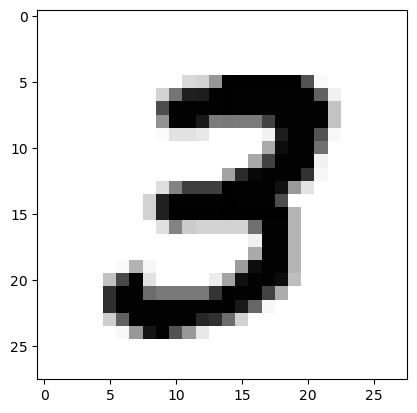

In [7]:
SHOW_ROW_NUMBER = 7
image_label, image = show_digit(train_df, SHOW_ROW_NUMBER)

7


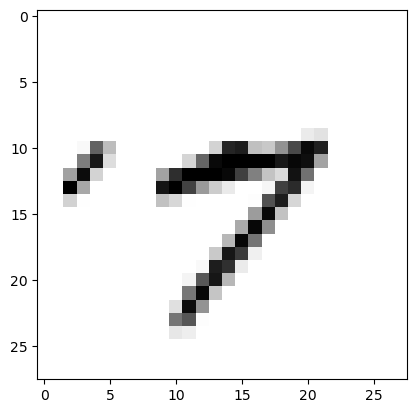

In [8]:
SHOW_ROW_NUMBER = 1023
image_label, image = show_digit(train_df, SHOW_ROW_NUMBER)

6


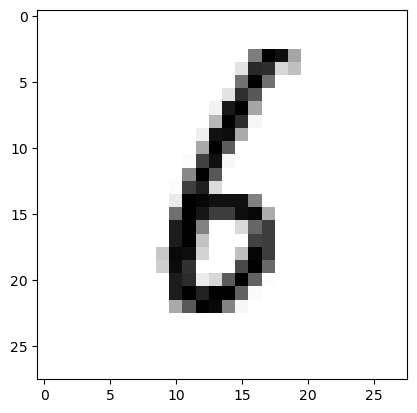

In [9]:
SHOW_ROW_NUMBER = 5098
image_label, image = show_digit(train_df, SHOW_ROW_NUMBER)

In [10]:
def get_partial_image(r:pd.Series,xpixels,ypixels):
    """
    create cropped image from upper right corner

    r : one row with columns: digit label, 784 columns of pixel values
    xpixels : width of crop from upper left corner
    ypixels : height of crop from upper left corner

    returns 1-D array of pixel values of length (xpixels*ypixels)
    """
    label = r[0]
    image = r[1:].values
    return image.reshape(28,28)[:xpixels,:ypixels].flatten()

In [26]:
CROP_WIDTH=20
CROP_HEIGHT=20

partial_image_train_df = train_df.apply(lambda row: get_partial_image(row, CROP_WIDTH,CROP_HEIGHT), axis=1, result_type='expand')
partial_image_test_df = test_df.apply(lambda row: get_partial_image(row, CROP_WIDTH,CROP_HEIGHT), axis=1, result_type='expand')

train_label = train_df[0]
test_label = test_df[0]

In [34]:
def show_digit2(df:pd.DataFrame, row_number:int, image_width:int, image_height:int):
    """
    display MNIST digit given df and row number

    df : dataframe with remaining 784 columns are pixel values
    row_number : row number for displaying 28x28 MNIST digit
    image_width : width of image
    image_height : height of image
    """
    image = df.iloc[row_number].values
    imgplot = plt.imshow(image.reshape(image_width,image_height), cmap='gray_r')
    print(image_label)    
    return image

3


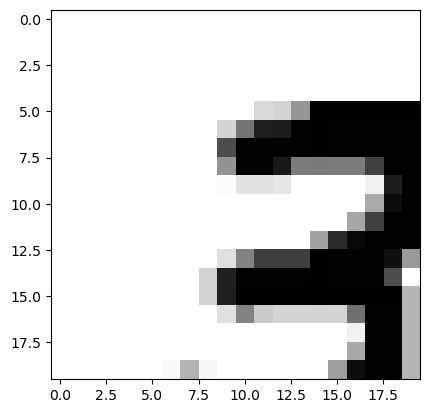

In [35]:
SHOW_ROW_NUMBER = 7
image = show_digit2(partial_image_train_df, SHOW_ROW_NUMBER, CROP_WIDTH, CROP_HEIGHT)

3


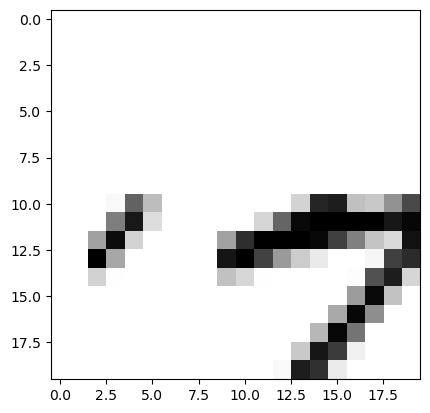

In [36]:
SHOW_ROW_NUMBER = 1023
image = show_digit2(partial_image_train_df, SHOW_ROW_NUMBER, CROP_WIDTH, CROP_HEIGHT)

6


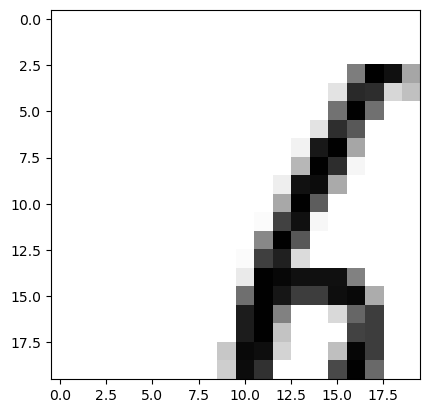

In [32]:
SHOW_ROW_NUMBER = 5098
image_label, image = show_digit2(partial_image_train_df, SHOW_ROW_NUMBER, CROP_WIDTH, CROP_HEIGHT)

# Lego Dataset

Questions:
- what is the oldest Lego set in the database?
- what is the most recent Lego set in the database?
- the quantity available for each Lego set
- the number of sets in each theme

## install packages and grab dataset locally

In [ ]:
# this cell is for using Colab - mount google drive and copy API key file into ~/.kaggle/kaggle.json
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path)  # or append(nb_path)

!mkdir ~/.kaggle
!cp /content/notebooks/API_Keys/kaggle.json ~/.kaggle/
!ls -al ~/.kaggle/

In [37]:
# if running from Raspberry Pi separately copy your Kaggle API key (kaggle.json) to ~/.kaggle/kaggle.json

# check that API key exists
!ls -al ~/.kaggle/

total 12
drwxr-xr-x  2 pi pi 4096 Oct  4 05:04 .
drwxr-xr-x 21 pi pi 4096 Oct  4 05:03 ..
-rw-r--r--  1 pi pi   63 Oct  4 05:04 kaggle.json


## Download Lego dataset using kaggle package

In [38]:
!sudo pip install kaggle
# download kaggle.json key into ~/.kaggle/kaggle.json
!mkdir lego-database
!cd lego-database
!kaggle datasets download rtatman/lego-database
!unzip lego-database -d lego-database # extract to subdirectory

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 394.7 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 504.5 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 575.1 kB/s eta 0:00:00a 0:00:01
100%|██████████████████████████████████████| 2.94M/2.94M [00:00<00:00, 14.5MB/s]
100%|██████████████████████████████████████| 2.94M/2.94M [00:00<00:00, 13.6MB/s]
Archive:  lego-database.zip
  inflating: colors.csv              
  inflating: downloads_schema.png    
  inflating: inventories.csv         
  inflating: inventory_parts.csv     
  inflating: inventory_sets.csv      
  inflating: part_categories.csv     
  inflating: parts.csv               
  inflating: sets.csv                
  inflating: themes.csv              


In [44]:
# exclude non-csv files
for csv in [f for f in os.listdir('lego-database') if '.csv' in f]:
    print(csv)

inventories.csv
inventory_parts.csv
parts.csv
themes.csv
colors.csv
sets.csv
part_categories.csv
inventory_sets.csv


In [46]:
!head -n 10 lego-database/themes.csv

id,name,parent_id
1,Technic,
2,Arctic Technic,1
3,Competition,1
4,Expert Builder,1
5,Model,1
6,Airport,5
7,Construction,5
8,Farm,5
9,Fire,5


In [47]:
df_colors = pd.read_csv('lego-database/colors.csv')
df_parts = pd.read_csv('lego-database/parts.csv')
df_themes = pd.read_csv('lego-database/themes.csv')
df_inventory_parts = pd.read_csv('lego-database/inventory_parts.csv')
df_inventory_sets = pd.read_csv('lego-database/inventory_sets.csv')
df_part_categories = pd.read_csv('lego-database/part_categories.csv')
df_sets = pd.read_csv('lego-database/sets.csv')
df_inventories = pd.read_csv('lego-database/inventories.csv')

## - what is the oldest Lego set in the database?

1950 is the oldest year in this dataset.  In 1950, seven sets were released by Lego


In [48]:
df_sets[df_sets.year==df_sets.year.min()]

,set_num,name,year,theme_id,num_parts
6935,700.1.1-1,Individual 2 x 4 Bricks,1950,371,10
6938,700.1.2-1,Individual 2 x 2 Bricks,1950,371,9
6954,700.A-1,Automatic Binding Bricks Small Brick Set (Lego...,1950,366,24
6956,700.B.1-1,Individual 1 x 4 x 2 Window (without glass),1950,371,7
6957,700.B.2-1,Individual 1 x 2 x 3 Window (without glass),1950,371,7
6958,700.B.3-1,Individual 1 x 2 x 2 Window (without glass),1950,371,7
6959,700.B.4-1,Individual 1 x 2 x 4 Door (without glass),1950,371,7


## what is the most recent Lego set in the database?

2017 is the most recent year in this dataset.  For 2017, 296 sets were available

In [49]:
df_sets[df_sets.year==df_sets.year.max()]

,set_num,name,year,theme_id,num_parts
236,10255-1,Assembly Square,2017,155,4009
237,10257-1,Carousel,2017,22,2669
405,10703-1,Creative Builder Box,2017,365,499
406,10704-1,Creative Box,2017,365,900
408,10706-1,Blue Creative Box,2017,365,78
...,...,...,...,...,...
11607,SW911720-1,The Ghost,2017,182,50
11608,SW911722-1,TIE Advanced foil pack,2017,158,26
11609,SW911723-1,Vulture Droid foil pack,2017,162,35
11610,SW911724-1,A-Wing,2017,182,47


## the quantity available for each Lego set

Aggregate `set_num` from `inventory_sets` table and take `sum()` of quantity column

In [50]:
df_inventory_sets.groupby('set_num').sum().sort_values('quantity', ascending=False) # sort by sets that have the most quantity

,inventory_id,quantity
set_num,,
71007-0,13992,60
8827-0,13447,60
8683-0,13603,60
71005-0,8782,60
71001-0,10052,60
...,...,...
60063-24,1899,1
60063-23,1899,1
60063-22,1899,1


## the number of sets in each theme

Use dataset schema to determine common keys that can be used to join two tables.  

To find number of sets in each theme, we need the `themes`, `sets`, and `inventory_sets` tables.  Two joins will be needed to connect the three tables to allow us to group by `themes.name` and take the sum of `inventory_sets.quantity`

1. `themes.id` contain the same information as `sets.theme_id`
2. `sets.set_num` contain the same information as `inventory_sets.set_num`

Note: if duplicate column names exist when `merge`-ing dataframes, Pandas adds `_x` and `_y` suffix to the column name




In [51]:
df_themes.head(4)

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0


In [52]:
df_sets.head(3)

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2


In [53]:
df_inventory_sets.head(3)

,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1


In [54]:
df_themes_sets = pd.merge(df_themes, df_sets, left_on='id', right_on='theme_id')
df_themes_sets.head(3)

,id,name_x,parent_id,set_num,name_y,year,theme_id,num_parts
0,1,Technic,NaN,1030-1,TECHNIC I: Simple Machines Set,1985,1,189
1,1,Technic,NaN,1032-1,TECHNIC II Set {4.5v},1985,1,278
2,1,Technic,NaN,1038-1,ERBIE the Robo-Car,1985,1,120


In [55]:
df_theme_sets_inventory_sets = pd.merge(df_themes_sets, df_inventory_sets, left_on='set_num', right_on='set_num')
df_theme_sets_inventory_sets.head(3)

,id,name_x,parent_id,set_num,name_y,year,theme_id,num_parts,inventory_id,quantity
0,1,Technic,NaN,9916-1,LEGO Electrical Capacitor,1999,1,1,3705,1
1,1,Technic,NaN,9916-1,LEGO Electrical Capacitor,1999,1,1,5955,1
2,3,Competition,1.0,2854-1,Bungee Chopper,1998,3,70,5217,1


In [56]:
# aggregate dataframe with theme, set, and inventory data to calculate number of sets for each theme
# use only theme name field and inventory quantity field

df_theme_sets_inventory_sets[['name_x', 'quantity']].groupby('name_x').sum().sort_values('quantity', ascending=False)

,quantity
name_x,
City,217
The Simpsons,152
Star Wars,107
Fire,89
Police,84
...,...
Space Police II,1
Divers,1
Exploriens,1
